In [352]:
#ИМПОРТ БИБЛИОТЕК

In [353]:
import pandas as pd
import numpy as np 
import sklearn 
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import recall_score
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition  import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor

In [354]:
#СОЗДАНИЕ КЛАССОВ

In [355]:
class Cluster(BaseEstimator, TransformerMixin):  

    def __init__(self, n_clusters = 3):
        self.n_clusters = n_clusters
        self.method = KMeans(n_clusters = self.n_clusters, random_state = 0)
        
        
    def fit(self, X, y=None):
        self.method.fit(X)       
        return self
    


    def transform(self, X, y=None):
        res = self.method.predict(X)
        X['cluster'] =  res
        return (X)

In [356]:
#ИЗВЛЕЧЕНИЕ И ПРОСМОТР ДАННЫХ

In [357]:
data = pd.read_csv("C:/diabetes.csv") 
data.head(500)

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,"3,9",19,female,61,119,"22,5",118,70,32,38,"0,84",No diabetes
1,2,146,79,41,"3,6",19,female,60,135,"26,4",108,58,33,40,"0,83",No diabetes
2,3,217,75,54,4,20,female,67,187,"29,3",110,72,40,45,"0,89",No diabetes
3,4,226,97,70,"3,2",20,female,64,114,"19,6",122,64,31,39,"0,79",No diabetes
4,5,164,91,67,"2,4",20,female,70,141,"20,2",122,86,32,39,"0,82",No diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,386,227,105,44,"5,2",83,female,59,125,"25,2",150,90,35,40,"0,88",No diabetes
386,387,226,279,52,"4,3",84,female,60,192,"37,5",144,88,41,48,"0,85",Diabetes
387,388,301,90,118,"2,6",89,female,61,115,"21,7",218,90,31,41,"0,76",No diabetes
388,389,232,184,114,2,91,female,61,127,24,170,82,35,38,"0,92",Diabetes


In [358]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   patient_number   390 non-null    int64 
 1   cholesterol      390 non-null    int64 
 2   glucose          390 non-null    int64 
 3   hdl_chol         390 non-null    int64 
 4   chol_hdl_ratio   390 non-null    object
 5   age              390 non-null    int64 
 6   gender           390 non-null    object
 7   height           390 non-null    int64 
 8   weight           390 non-null    int64 
 9   bmi              390 non-null    object
 10  systolic_bp      390 non-null    int64 
 11  diastolic_bp     390 non-null    int64 
 12  waist            390 non-null    int64 
 13  hip              390 non-null    int64 
 14  waist_hip_ratio  390 non-null    object
 15  diabetes         390 non-null    object
dtypes: int64(11), object(5)
memory usage: 48.9+ KB


In [366]:
feature_names = data.columns.tolist() 
for column in feature_names: 
    print(column) 
    print(data[column].value_counts(dropna=False))

cholesterol
179    11
204     9
215     7
194     7
219     7
       ..
307     1
140     1
284     1
222     1
301     1
Name: cholesterol, Length: 153, dtype: int64
glucose
85     18
81     15
92     14
87     12
84     12
       ..
185     1
57      1
297     1
369     1
184     1
Name: glucose, Length: 116, dtype: int64
hdl_chol
46     21
36     20
44     20
34     18
42     15
       ..
78      1
94      1
91      1
84      1
114     1
Name: hdl_chol, Length: 75, dtype: int64
chol_hdl_ratio
3.6    15
3.0    14
5.3    14
3.1    13
4.1    12
       ..
7.6     1
9.4     1
8.3     1
2.1     1
2.0     1
Name: chol_hdl_ratio, Length: 69, dtype: int64
age
40    16
36    13
43    12
41    12
37    11
      ..
83     1
84     1
89     1
91     1
92     1
Name: age, Length: 68, dtype: int64
gender
0    228
1    162
Name: gender, dtype: int64
height
63    40
69    36
67    36
65    34
64    33
62    33
66    32
68    26
70    22
71    21
61    19
72    14
60    11
59     9
73     8
74     5


In [360]:
#ЗАМЕНА ТИПОВ ДАННЫХ ЧИСЛОВЫХ СТОЛБЦОВ OBJECT НА FLOAT

In [361]:
data['chol_hdl_ratio'] = [x.replace(',', '.') for x in data['chol_hdl_ratio']]
data['chol_hdl_ratio'] = data['chol_hdl_ratio'].astype(float)

data['bmi'] = [x.replace(',', '.') for x in data['bmi']]
data['bmi'] = data['bmi'].astype(float)

data['waist_hip_ratio'] = [x.replace(',', '.') for x in data['waist_hip_ratio']]
data['waist_hip_ratio'] = data['waist_hip_ratio'].astype(float)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   patient_number   390 non-null    int64  
 1   cholesterol      390 non-null    int64  
 2   glucose          390 non-null    int64  
 3   hdl_chol         390 non-null    int64  
 4   chol_hdl_ratio   390 non-null    float64
 5   age              390 non-null    int64  
 6   gender           390 non-null    object 
 7   height           390 non-null    int64  
 8   weight           390 non-null    int64  
 9   bmi              390 non-null    float64
 10  systolic_bp      390 non-null    int64  
 11  diastolic_bp     390 non-null    int64  
 12  waist            390 non-null    int64  
 13  hip              390 non-null    int64  
 14  waist_hip_ratio  390 non-null    float64
 15  diabetes         390 non-null    object 
dtypes: float64(3), int64(11), object(2)
memory usage: 48.9+ KB


In [362]:
#ПРЕОБРАЗОВАНИЕ НЕ ЧИСЛОВЫХ СТОЛБЦОВ 

In [363]:
le1 = LabelEncoder()
data['gender'] = le1.fit_transform(data['gender'])

data.loc[data['diabetes'] == 'Diabetes', 'diabetes'] = 1 
data.loc[data['diabetes'] == 'No diabetes', 'diabetes'] = 0
data['diabetes'] = data['diabetes'].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   patient_number   390 non-null    int64  
 1   cholesterol      390 non-null    int64  
 2   glucose          390 non-null    int64  
 3   hdl_chol         390 non-null    int64  
 4   chol_hdl_ratio   390 non-null    float64
 5   age              390 non-null    int64  
 6   gender           390 non-null    int32  
 7   height           390 non-null    int64  
 8   weight           390 non-null    int64  
 9   bmi              390 non-null    float64
 10  systolic_bp      390 non-null    int64  
 11  diastolic_bp     390 non-null    int64  
 12  waist            390 non-null    int64  
 13  hip              390 non-null    int64  
 14  waist_hip_ratio  390 non-null    float64
 15  diabetes         390 non-null    int32  
dtypes: float64(3), int32(2), int64(11)
memory usage: 45.8 KB


In [364]:
#УДАЛЕНИЕ СТОЛБЦА С НОМЕРОМ ПАЦИЕНТА

In [365]:
data = data.drop('patient_number', axis = 1)
data.describe()

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,207.230769,107.338462,50.266667,4.524615,46.774359,0.415385,65.951282,177.407692,28.775641,137.133333,83.289744,37.869231,42.992308,0.881385,0.153846
std,44.666005,53.798188,17.279069,1.736634,16.435911,0.493421,3.918867,40.407824,6.600915,22.859528,13.498192,5.760947,5.664342,0.073212,0.361265
min,78.000000,48.000000,12.000000,1.500000,19.000000,0.000000,52.000000,99.000000,15.200000,90.000000,48.000000,26.000000,30.000000,0.680000,0.000000
25%,179.000000,81.000000,38.000000,3.200000,34.000000,0.000000,63.000000,150.250000,24.100000,122.000000,75.000000,33.000000,39.000000,0.830000,0.000000
50%,203.000000,90.000000,46.000000,4.200000,44.500000,0.000000,66.000000,173.000000,27.800000,136.000000,82.000000,37.000000,42.000000,0.880000,0.000000
75%,229.000000,107.750000,59.000000,5.400000,60.000000,1.000000,69.000000,200.000000,32.275000,148.000000,90.000000,41.000000,46.000000,0.930000,0.000000
max,443.000000,385.000000,120.000000,19.300000,92.000000,1.000000,76.000000,325.000000,55.800000,250.000000,124.000000,56.000000,64.000000,1.140000,1.000000


In [271]:
#ПОСТРОЕНИЕ ГРАФИКОВ РАСПРЕДЕЛНИЯ ДАННЫХ

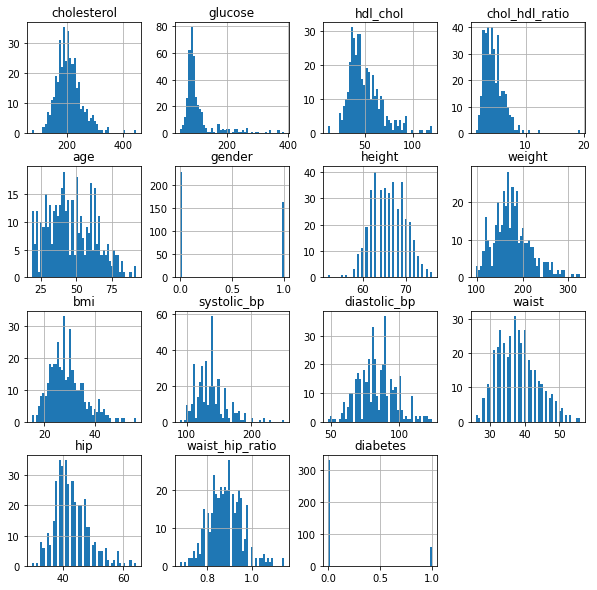

In [272]:
data.hist(bins=50, figsize=(10,10))
plt.show()

In [273]:
#ПОСТРОЕНИЕ КОРРЕЛЯЦИОННОЙ МАТРИЦЫ

In [274]:
corr_matrix = data.corr()
corr_matrix['diabetes'].sort_values()

hdl_chol          -0.123133
gender             0.015531
height             0.023466
diastolic_bp       0.049351
hip                0.143792
bmi                0.145274
weight             0.162987
waist_hip_ratio    0.175623
systolic_bp        0.198600
cholesterol        0.204262
waist              0.223378
chol_hdl_ratio     0.272987
age                0.301995
glucose            0.689080
diabetes           1.000000
Name: diabetes, dtype: float64

In [275]:
corr_matrix.style.background_gradient(cmap='coolwarm')

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
cholesterol,1.000000,0.158102,0.193162,0.475927,0.247333,-0.030139,-0.063601,0.062359,0.091695,0.207741,0.166241,0.134038,0.093364,0.091847,0.204262
glucose,0.158102,1.000000,-0.158302,0.282210,0.294392,0.093372,0.098052,0.190358,0.129286,0.162777,0.020262,0.222336,0.138223,0.185117,0.689080
hdl_chol,0.193162,-0.158302,1.000000,-0.681867,0.028210,-0.108305,-0.087238,-0.291883,-0.241860,0.031807,0.078342,-0.276697,-0.223837,-0.158777,-0.123133
chol_hdl_ratio,0.475927,0.282210,-0.681867,1.000000,0.163201,0.102938,0.081162,0.278812,0.228407,0.115505,0.038242,0.313262,0.208902,0.243329,0.272987
age,0.247333,0.294392,0.028210,0.163201,1.000000,0.084177,-0.082229,-0.056784,-0.009164,0.453417,0.068649,0.150585,0.004675,0.275188,0.301995
gender,-0.030139,0.093372,-0.108305,0.102938,0.084177,1.000000,0.677876,0.092053,-0.254189,0.035417,0.071043,-0.045955,-0.272028,0.346253,0.015531
height,-0.063601,0.098052,-0.087238,0.081162,-0.082229,0.677876,1.000000,0.255389,-0.259589,-0.040704,0.043617,0.057447,-0.095906,0.252548,0.023466
weight,0.062359,0.190358,-0.291883,0.278812,-0.056784,0.092053,0.255389,1.000000,0.860147,0.097497,0.166477,0.847766,0.826985,0.250461,0.162987
bmi,0.091695,0.129286,-0.241860,0.228407,-0.009164,-0.254189,-0.259589,0.860147,1.000000,0.121408,0.145304,0.810701,0.881728,0.100873,0.145274
systolic_bp,0.207741,0.162777,0.031807,0.115505,0.453417,0.035417,-0.040704,0.097497,0.121408,1.000000,0.603662,0.210934,0.155321,0.137871,0.198600


In [276]:
#ФОРМИРОВАНИЕ ФИЧ И ТАРГЕТА, УДАЛЕНИЕ СТОЛБЦОВ СЛАБОКОРРЕЛИРУЮЩИХ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ 
#(НЕ ДАЛО УЛУЧШЕНИЙ, ПОЭТОМУ БЫЛО ПРИНЯТО РЕШЕНИЕ ОСТАВИТЬ ИХ, НО ПЕРЕД ОБУЧЕНИЕМ ВОСПОЛЬЗОВАТЬСЯ PCA) 

In [277]:
#features = data.drop('gender', axis = 1)
#features = data.drop('height', axis = 1)
#features = data.drop('diastolic_bp', axis = 1)
features = data.drop('diabetes', axis = 1)
labels = data['diabetes']
features

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio
0,193,77,49,3.9,19,0,61,119,22.5,118,70,32,38,0.84
1,146,79,41,3.6,19,0,60,135,26.4,108,58,33,40,0.83
2,217,75,54,4.0,20,0,67,187,29.3,110,72,40,45,0.89
3,226,97,70,3.2,20,0,64,114,19.6,122,64,31,39,0.79
4,164,91,67,2.4,20,0,70,141,20.2,122,86,32,39,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,227,105,44,5.2,83,0,59,125,25.2,150,90,35,40,0.88
386,226,279,52,4.3,84,0,60,192,37.5,144,88,41,48,0.85
387,301,90,118,2.6,89,0,61,115,21.7,218,90,31,41,0.76
388,232,184,114,2.0,91,0,61,127,24.0,170,82,35,38,0.92


In [278]:
labels

0      0
1      0
2      0
3      0
4      0
      ..
385    0
386    1
387    0
388    1
389    0
Name: diabetes, Length: 390, dtype: int32

In [279]:
#ПОСТРОЕНИЕ ГРАФИКА РАСПРЕДЕЛЕНИЯ ОБРАЗЦОВ В ДАТАСЕТЕ 

In [280]:
scaler = StandardScaler()
features_sc = scaler.fit_transform(features)

In [281]:
pca = PCA(n_components=2)
features_sc_pca = pca.fit_transform(features_sc)
features_sc_pca

array([[-2.62674980e+00, -1.52480321e+00],
       [-2.25115011e+00, -2.30527108e+00],
       [-1.39990614e-01, -1.38866901e+00],
       [-3.21613067e+00, -1.40929918e+00],
       [-2.74616182e+00, -8.10266687e-01],
       [-1.54885070e+00, -1.59454121e+00],
       [-3.13175476e+00, -1.54997523e+00],
       [-3.39831911e+00,  3.44127004e-01],
       [-2.10297263e+00, -1.38446760e-01],
       [-5.09572832e-01, -3.04683673e+00],
       [-1.68900764e+00, -1.22897228e-01],
       [ 3.71421189e+00, -2.21247098e+00],
       [-6.07176873e-01, -1.44059730e+00],
       [-2.97563961e+00, -2.14074013e+00],
       [-2.63025368e+00, -3.25153187e-01],
       [-7.23939122e-01, -1.39732251e+00],
       [-2.26255567e+00,  4.42474797e-01],
       [ 1.42315457e+00, -3.34700235e+00],
       [-3.49656516e+00, -1.28657456e+00],
       [-1.83914165e+00, -1.25466404e+00],
       [ 1.31582797e+00, -1.14070264e+00],
       [-3.42104491e+00, -1.84436947e+00],
       [-1.71308409e+00, -1.38098510e+00],
       [ 1.

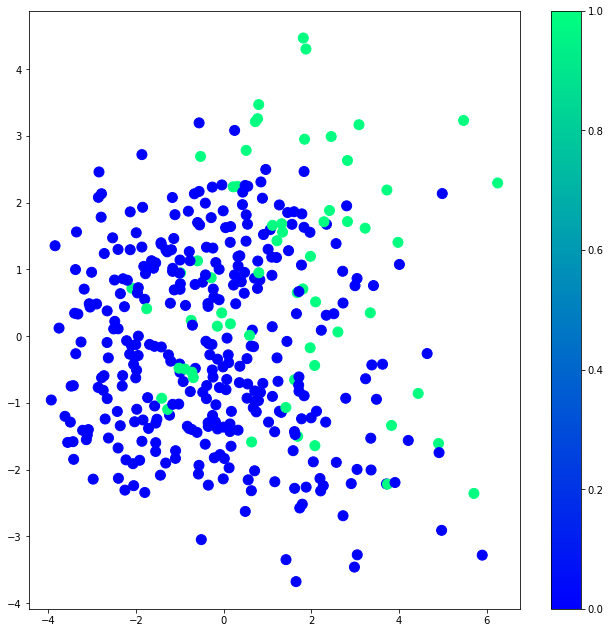

In [282]:
x = features_sc_pca[:, 0]
y = features_sc_pca[:, 1]
z = labels
plt.figure(figsize=(11,11))
cm = plt.get_cmap('winter')
sc = plt.scatter(x, y, c=z, cmap=cm, s=100)
plt.colorbar(sc)
plt.show()

In [283]:
#РАЗБИЕНИЕ ДАННЫХ НА ОБУЧЕНИЕ И ТЕСТ

In [284]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, stratify=labels, test_size=0.2, random_state=42)

In [285]:
#ЕЩЕ ОДНО РАЗБИЕНИЕ ОБУЧЕНИЯ ДЛЯ ТЕСТИРОВАНИЯ МОДЕЛЕЙ

In [286]:
X_train_mini, X_test_mini, y_train_mini, y_test_mini = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=42)

In [287]:
#ПОИСК ОПТИМАЛЬНЫХ МОДЕЛЕЙ БЕЗ НАСТРОЙКИ ПАРАМЕТРОВ ПОД МЕТРИКУ RECALL

In [288]:
lg=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
nb=GaussianNB()
knn=KNeighborsClassifier()
xgb=XGBClassifier()
sgd=SGDClassifier()
svc=SVC()
mlpc=MLPClassifier()

In [289]:
alg=[lg,dt,rf,nb,knn,xgb,sgd,svc,mlpc]

In [290]:
y_train_mini

16     0
316    0
37     0
8      0
56     0
      ..
229    0
310    1
304    0
29     0
183    0
Name: diabetes, Length: 249, dtype: int32

In [291]:
for i in alg:
    i.fit(X_train_mini, y_train_mini)
    y_pred = i.predict(X_test_mini) 
    score=recall_score(y_test_mini, y_pred)
    print(score,i)

0.4 LogisticRegression()
0.6 DecisionTreeClassifier()
0.5 RandomForestClassifier()
0.6 GaussianNB()
0.5 KNeighborsClassifier()
0.6 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)
0.5 SGDClassifier()
0.5 SVC()
0.6 MLPClassifier()


In [292]:
#ПОИСК ОПТИМАЛЬНЫХ ГИПЕРПАРАМЕТРОВ ВЫБРАННОЙ МОДЕЛИ

In [293]:
stratifiedkfold = StratifiedKFold(n_splits=5)

In [294]:
pipe = Pipeline([('SS', StandardScaler()), ('PCA', PCA()), ('classifier', XGBClassifier())])
param_grid = [
    {'classifier__max_depth': [1, 2, 3, 4, 5, 6],
     'classifier__learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
     'PCA__n_components': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]}
]

grid = GridSearchCV(pipe, param_grid, cv=stratifiedkfold, scoring='recall')
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('SS', StandardScaler()), ('PCA', PCA()),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      fe...
                                                   

In [295]:
grid.best_params_

{'PCA__n_components': 3,
 'classifier__learning_rate': 100,
 'classifier__max_depth': 3}

In [296]:
grid.best_score_

1.0

In [297]:
#ПОИСК МОДЕЛЕЙ ПОД F1 SCORE

In [298]:
for i in alg:
    i.fit(X_train_mini, y_train_mini)
    y_pred = i.predict(X_test_mini) 
    score=f1_score(y_test_mini, y_pred)
    print(score,i)

0.5714285714285715 LogisticRegression()
0.6666666666666666 DecisionTreeClassifier()
0.5333333333333333 RandomForestClassifier()
0.6666666666666665 GaussianNB()
0.625 KNeighborsClassifier()
0.7058823529411764 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)
0.5714285714285715 SGDClassifier()
0.6666666666666666 SVC()
0.6666666666666666

In [299]:
#ПОИСК ОПТИМАЛЬНЫХ ГИПЕРПАРАМЕТРОВ ДЛЯ ВЫБРАННОЙ МОДЕЛИ(F1_score)

In [224]:
pipe2 = Pipeline([('SS', StandardScaler()), ('PCA', PCA()), ('classifier', XGBClassifier())])
param_grid2 = [
    {'classifier__max_depth': [1, 2, 3, 4, 5, 6],
     'classifier__learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
     'PCA__n_components': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]}
]
grid2 = GridSearchCV(pipe2, param_grid2, cv=stratifiedkfold, scoring='f1')
grid2.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('SS', StandardScaler()), ('PCA', PCA()),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      fe...
                                                   

In [225]:
grid2.best_params_

{'PCA__n_components': 10,
 'classifier__learning_rate': 0.1,
 'classifier__max_depth': 3}

In [226]:
grid2.best_score_

0.6702614379084967

In [227]:
#СТЭКИНГ ЛУЧШИХ МОДЕЛЕЙ БЕЗ НАСТРОЙКИ

In [305]:
estimators_stack = [('xgb', make_pipeline(XGBClassifier())),
              ('svc', make_pipeline(StandardScaler(), SVC())),
              ('mlp', make_pipeline(StandardScaler(), MLPClassifier(solver='lbfgs', random_state=10)))]
clf1 = StackingClassifier(estimators= estimators_stack , final_estimator=LGBMClassifier())
clf1.fit(X_train_mini, y_train_mini)

StackingClassifier(estimators=[('xgb',
                                Pipeline(steps=[('xgbclassifier',
                                                 XGBClassifier(base_score=None,
                                                               booster=None,
                                                               callbacks=None,
                                                               colsample_bylevel=None,
                                                               colsample_bynode=None,
                                                               colsample_bytree=None,
                                                               early_stopping_rounds=None,
                                                               enable_categorical=False,
                                                               eval_metric=None,
                                                               feature_types=None,
                                                        

In [306]:
y_pred_stack = clf1.predict(X_test_mini)

In [307]:
print(f1_score(y_test_mini, y_pred_stack))

0.7058823529411764


In [303]:
#ПОИСК ЛУЧШЕГО ЗНАЧЕНИЯ ПАРАМЕТРА n_components ДЛЯ PCA (8)

In [368]:
stack = [('xgb', XGBClassifier()), ('mlpc', MLPClassifier()), ('svc', SVC())]
clf_test = StackingClassifier(estimators= stack , final_estimator=LGBMClassifier())
scaler2 = StandardScaler()
X_train_new = scaler2.fit_transform(X_train_mini)
X_test_new = scaler2.transform(X_test_mini)

for i in range(8, 15):
    pca2 = PCA(n_components=i)
    X_train_new2 = pca2.fit_transform(X_train_new)
    X_test_new2 = pca2.transform(X_test_new)
    clf_test.fit(X_train_new2, y_train_mini)
    y_pred_test=clf_test.predict(X_test_new2)
    print(F"{i} components:")
    print(f1_score(y_test_mini, y_pred_test))

#components 9

8 components:
0.6666666666666666
9 components:
0.7058823529411764
10 components:
0.7058823529411764
11 components:
0.588235294117647
12 components:
0.625
13 components:
0.625
14 components:
0.5333333333333333


In [320]:
#СТЭКИНГ ЛУЧШИХ МОДЕЛЕЙ (F1_score)

In [321]:
estimators = [('xgb', make_pipeline(StandardScaler(), PCA(n_components=9), XGBClassifier())),
              ('svc', make_pipeline(StandardScaler(), PCA(n_components=9), SVC())),
              ('mlp', make_pipeline(StandardScaler(), PCA(n_components=9), MLPClassifier(solver='lbfgs', random_state=10)))]
clf2 = StackingClassifier(estimators= estimators , final_estimator=LGBMClassifier())
param_grid3 = {'xgb__xgbclassifier__learning_rate': [0.01, 0.1, 1, 10, 100],
               'xgb__xgbclassifier__max_depth': [1, 2, 3, 4],
               'svc__svc__C': [0.01, 0.1, 1, 10, 100],
               'svc__svc__gamma': [0.01, 0.1, 1, 10, 100],
               'mlp__mlpclassifier__hidden_layer_sizes': [[10], [10,10]] 
             
              }
grid3 = GridSearchCV(estimator=clf2, param_grid=param_grid3, cv=stratifiedkfold, scoring='f1')
grid3.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=StackingClassifier(estimators=[('xgb',
                                                       Pipeline(steps=[('standardscaler',
                                                                        StandardScaler()),
                                                                       ('pca',
                                                                        PCA(n_components=9)),
                                                                       ('xgbclassifier',
                                                                        XGBClassifier(base_score=None,
                                                                                      booster=None,
                                                                                      callbacks=None,
                                                                                      colsample_bylevel=None,
 

In [322]:
clf2.get_params().keys()

dict_keys(['cv', 'estimators', 'final_estimator__boosting_type', 'final_estimator__class_weight', 'final_estimator__colsample_bytree', 'final_estimator__importance_type', 'final_estimator__learning_rate', 'final_estimator__max_depth', 'final_estimator__min_child_samples', 'final_estimator__min_child_weight', 'final_estimator__min_split_gain', 'final_estimator__n_estimators', 'final_estimator__n_jobs', 'final_estimator__num_leaves', 'final_estimator__objective', 'final_estimator__random_state', 'final_estimator__reg_alpha', 'final_estimator__reg_lambda', 'final_estimator__silent', 'final_estimator__subsample', 'final_estimator__subsample_for_bin', 'final_estimator__subsample_freq', 'final_estimator', 'n_jobs', 'passthrough', 'stack_method', 'verbose', 'xgb', 'svc', 'mlp', 'xgb__memory', 'xgb__steps', 'xgb__verbose', 'xgb__standardscaler', 'xgb__pca', 'xgb__xgbclassifier', 'xgb__standardscaler__copy', 'xgb__standardscaler__with_mean', 'xgb__standardscaler__with_std', 'xgb__pca__copy', 'x

In [323]:
grid3.best_params_

{'mlp__mlpclassifier__hidden_layer_sizes': [10, 10],
 'svc__svc__C': 0.01,
 'svc__svc__gamma': 0.01,
 'xgb__xgbclassifier__learning_rate': 0.01,
 'xgb__xgbclassifier__max_depth': 4}

In [324]:
grid3.best_score_

0.684047619047619

In [325]:
y_pred3 = grid3.predict(X_test)

In [326]:
print(f1_score(y_test, y_pred3))

0.6923076923076924


In [327]:
confusion3 = confusion_matrix(y_test, y_pred3)
print("Confusion matrix:\n{}".format(confusion3))

Confusion matrix:
[[61  5]
 [ 3  9]]


In [328]:
print(classification_report(y_test, y_pred3, target_names=["No diabetes", "Diabetes"]))

              precision    recall  f1-score   support

 No diabetes       0.95      0.92      0.94        66
    Diabetes       0.64      0.75      0.69        12

    accuracy                           0.90        78
   macro avg       0.80      0.84      0.82        78
weighted avg       0.91      0.90      0.90        78



In [330]:
#ИТОГОВАЯ МОДЕЛЬ

In [331]:
estimators_res = [('xgb', make_pipeline(StandardScaler(), PCA(n_components=9), XGBClassifier(learning_rate=0.01, max_depth=4))),
              ('svc', make_pipeline(StandardScaler(), PCA(n_components=9), SVC(C=0.01, gamma=0.01))),
              ('mlp', make_pipeline(StandardScaler(), PCA(n_components=9), MLPClassifier(solver='lbfgs', hidden_layer_sizes=[10, 10], random_state=10)))]
clf_res = StackingClassifier(estimators= estimators_res , final_estimator=LGBMClassifier())

In [332]:
clf_res.fit(X_train, y_train)

StackingClassifier(estimators=[('xgb',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('pca', PCA(n_components=9)),
                                                ('xgbclassifier',
                                                 XGBClassifier(base_score=None,
                                                               booster=None,
                                                               callbacks=None,
                                                               colsample_bylevel=None,
                                                               colsample_bynode=None,
                                                               colsample_bytree=None,
                                                               early_stopping_rounds=None,
                                                               enable_categorical=False,
       

In [333]:
y_pred_res = clf_res.predict(X_test)

In [334]:
print(f1_score(y_test, y_pred_res))

0.6923076923076924


In [335]:
confusion_res = confusion_matrix(y_test, y_pred_res)
print("Confusion matrix:\n{}".format(confusion_res))

Confusion matrix:
[[61  5]
 [ 3  9]]


In [336]:
print(classification_report(y_test, y_pred_res, target_names=["No diabetes", "Diabetes"]))

              precision    recall  f1-score   support

 No diabetes       0.95      0.92      0.94        66
    Diabetes       0.64      0.75      0.69        12

    accuracy                           0.90        78
   macro avg       0.80      0.84      0.82        78
weighted avg       0.91      0.90      0.90        78



In [339]:
# saving the model
import pickle
with open(r'C:\Users\kgayvoronskiy\webapp\model\model_diabetes.pkl','wb') as file:
    pickle.dump(clf_res, file)